# Analisi esplorativa delle vendite di una catena di vendita al dettaglio di elettronica

Nella cartella Sales_data sono presenti i dati di vendita di un'azienda per il 2019. È disponibile un file csv per ogni mese.

Ogni file contiene le seguenti colonne:
* OrderID: l'identificativo univoco dell'ordine
* Prodotto: la descrizione del prodotto
* Quantità ordinata: la quantità venduta
* Prezzo unitario: il prezzo unitario
* Data ordine: la data di acquisto
* Indirizzo di acquisto: l'indirizzo del punto vendita.

Analizzererò questi dati per rispondere alle seguenti domande:

* Qual è il mese migliore per le vendite? e Qual è il fatturato di questo mese?
* In quale città abbiamo venduto più prodotti?
* A che ora del giorno dovremmo fare pubblicità per aumentare le vendite?
* Quali prodotti vengono spesso acquistati insieme?
* Quale prodotto ha venduto di più e perché?

Le mie soluzioni saranno supportate da visualizzazioni pertinenti per aiutare l'azienda a migliorare i propri dati per l'anno successivo.




# Importare i dati

In [207]:
#Importare le librerie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [208]:
data = "/content/drive/MyDrive/Sales_Data"

In [209]:
#vedere i file csv all'interno della cartella
os.listdir(data)

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [210]:
#creo una list comprehension per leggere tutti i csv
mesi = ['January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December']

files = [f"/content/drive/MyDrive/Sales_Data/Sales_{month}_2019.csv" for month in mesi]

In [211]:
files

['/content/drive/MyDrive/Sales_Data/Sales_January_2019.csv',
 '/content/drive/MyDrive/Sales_Data/Sales_February_2019.csv',
 '/content/drive/MyDrive/Sales_Data/Sales_March_2019.csv',
 '/content/drive/MyDrive/Sales_Data/Sales_April_2019.csv',
 '/content/drive/MyDrive/Sales_Data/Sales_May_2019.csv',
 '/content/drive/MyDrive/Sales_Data/Sales_June_2019.csv',
 '/content/drive/MyDrive/Sales_Data/Sales_July_2019.csv',
 '/content/drive/MyDrive/Sales_Data/Sales_August_2019.csv',
 '/content/drive/MyDrive/Sales_Data/Sales_September_2019.csv',
 '/content/drive/MyDrive/Sales_Data/Sales_October_2019.csv',
 '/content/drive/MyDrive/Sales_Data/Sales_November_2019.csv',
 '/content/drive/MyDrive/Sales_Data/Sales_December_2019.csv']

In [212]:
#faccio una merge per ottenere un solo csv contenente tutti i csv dei mesi dell
df = pd.DataFrame()

for file in files:
  dataMesi = pd.read_csv(file)
  df = pd.concat([df, dataMesi])

In [213]:
df.shape

(186850, 6)

In [214]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [216]:
#Verificare quante valori mancanti ci sono
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [217]:
val_mancanti = df[df.isnull().any(axis=1)]
val_mancanti

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
22945,NaN,NaN,NaN,NaN,NaN,NaN
22962,NaN,NaN,NaN,NaN,NaN,NaN
23309,NaN,NaN,NaN,NaN,NaN,NaN
23996,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
#cancellare i valori mancanti
df.dropna(inplace=True)
df.shape

(186305, 6)

Pulizia valori anomali

In [219]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [220]:
df[df['Order Date'] == 'Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
23198,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
23337,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
23748,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
24192,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [221]:
df_clean = df.drop(df.loc[df['Order Date'] == 'Order Date', :].index)
df_clean

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [222]:
df_clean.loc[~df_clean['Order ID'].str.isdigit(), :]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


cambiare il tipo dei dati

In [223]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [224]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          182735 non-null  object
 1   Product           182735 non-null  object
 2   Quantity Ordered  182735 non-null  object
 3   Price Each        182735 non-null  object
 4   Order Date        182735 non-null  object
 5   Purchase Address  182735 non-null  object
dtypes: object(6)
memory usage: 9.8+ MB


In [225]:
df_clean['Quantity Ordered'] = df_clean['Quantity Ordered'].astype('int')

In [226]:
df_clean['Price Each'] = pd.to_numeric(df_clean['Price Each'])

In [227]:
df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'])

In [228]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          182735 non-null  object        
 1   Product           182735 non-null  object        
 2   Quantity Ordered  182735 non-null  int64         
 3   Price Each        182735 non-null  float64       
 4   Order Date        182735 non-null  datetime64[ns]
 5   Purchase Address  182735 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.8+ MB


#Analisi

 Qual è il mese migliore per le vendite? e Qual è il fatturato di questo mese?

In [229]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [230]:
#settare 'Order Date' come index
df_clean = df_clean.set_index('Order Date')

In [231]:
#ordinare l'index
df_clean.sort_index(inplace = True)

In [232]:
#creare una nuova colonna
df_clean['Month'] = df_clean.index.month_name()

In [233]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month
Order Date,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January


In [234]:
#creare una nuova colonna per calcolare i ricavi
df_clean['Ricavi'] = df_clean['Quantity Ordered'] * df_clean['Price Each']

In [235]:
df_clean.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Ricavi
Order Date,,,,,,,
2019-10-25 18:32:00,277739,Lightning Charging Cable,1,14.95,"448 West St, Portland, ME 04101",October,14.95
2019-07-06 12:11:00,236262,USB-C Charging Cable,1,11.95,"486 Cherry St, San Francisco, CA 94016",July,11.95
2019-08-24 19:38:00,244361,AAA Batteries (4-pack),1,2.99,"726 Maple St, Boston, MA 02215",August,2.99
2019-04-17 10:03:00,176637,AAA Batteries (4-pack),1,2.99,"261 Sunset St, New York City, NY 10001",April,2.99
2019-10-22 11:06:00,277455,USB-C Charging Cable,1,11.95,"799 2nd St, New York City, NY 10001",October,11.95


In [236]:
df_clean.groupby('Month')["Ricavi"].sum().sort_values(ascending=False)

Month
December     4557905.42
October      3679254.16
April        3336376.42
November     3149785.09
May          3101881.04
March        2755969.40
July         2587444.91
June         2524464.99
August       2191698.31
February     2158127.48
September    2050361.26
January      1786511.29
Name: Ricavi, dtype: float64

In [237]:
order = ["January", "February", "March", "April", "May", "June", "July", "August",
                  "September", "October", "November", "December"]

In [238]:
df_clean.groupby('Month')["Ricavi"].sum().loc[order]

Month
January      1786511.29
February     2158127.48
March        2755969.40
April        3336376.42
May          3101881.04
June         2524464.99
July         2587444.91
August       2191698.31
September    2050361.26
October      3679254.16
November     3149785.09
December     4557905.42
Name: Ricavi, dtype: float64

Text(0.5, 1.0, 'Ricavi per mesi')

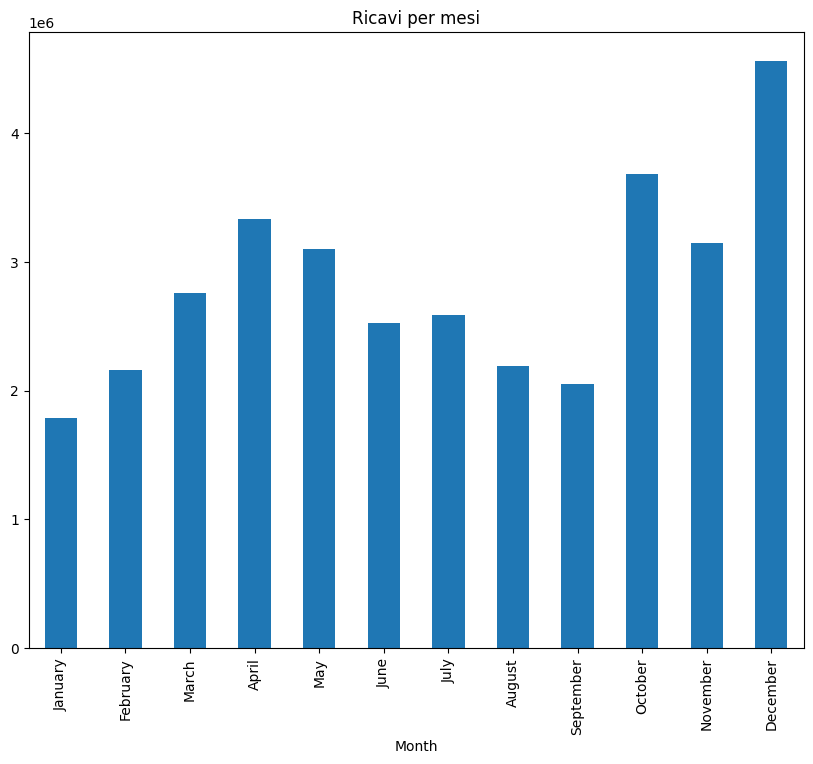

In [239]:
df_clean.groupby('Month')["Ricavi"].sum().loc[order].plot.bar(figsize=(10, 8))
plt.title('Ricavi per mesi')

In quale città abbiamo venduto più prodotti?

In [240]:
df_clean['Purchase Address'].unique()

array(['9 Lake St, New York City, NY 10001',
       '760 Church St, San Francisco, CA 94016',
       '735 5th St, New York City, NY 10001', ...,
       '731 7th St, New York City, NY 10001',
       '754 Hickory St, New York City, NY 10001',
       '657 Spruce St, New York City, NY 10001'], dtype=object)

In [241]:
#funzione che ritorna solo il nome della città
def get_citta(indirizzo):
  return indirizzo.split(',')[1].strip()

In [242]:
#creare una nuova colonna con i nomi delle città
df_clean['Citta'] = df_clean['Purchase Address'].apply(get_citta)

In [243]:
df_clean.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Ricavi,Citta
Order Date,,,,,,,,
2019-12-09 18:21:00,296141,Lightning Charging Cable,1,14.95,"787 Elm St, San Francisco, CA 94016",December,14.95,San Francisco
2019-09-23 19:52:00,257354,Bose SoundSport Headphones,1,99.99,"188 Maple St, Seattle, WA 98101",September,99.99,Seattle
2019-10-16 22:59:00,278753,AA Batteries (4-pack),1,3.84,"81 Lincoln St, Los Angeles, CA 90001",October,3.84,Los Angeles
2019-04-04 19:41:00,187064,AAA Batteries (4-pack),1,2.99,"688 Hill St, New York City, NY 10001",April,2.99,New York City
2019-08-30 12:09:00,246917,20in Monitor,1,109.99,"228 10th St, Los Angeles, CA 90001",August,109.99,Los Angeles


In [244]:
#città che ha venduto di più
df_clean.groupby('Citta').sum()["Ricavi"].sort_values(ascending=False)

<ipython-input-244-a9d21f8e354f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clean.groupby('Citta').sum()["Ricavi"].sort_values(ascending=False)


Citta
San Francisco    8124120.94
Los Angeles      5354039.93
New York City    4581658.91
Boston           3604080.86
Atlanta          2741642.05
Dallas           2717793.72
Seattle          2693048.60
Portland         2276649.24
Austin           1786745.52
Name: Ricavi, dtype: float64

<ipython-input-245-b7cd75c2bafd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clean.groupby('Citta').sum()["Ricavi"].sort_values(ascending=False).plot.barh(figsize=(10, 8))


<Axes: ylabel='Citta'>

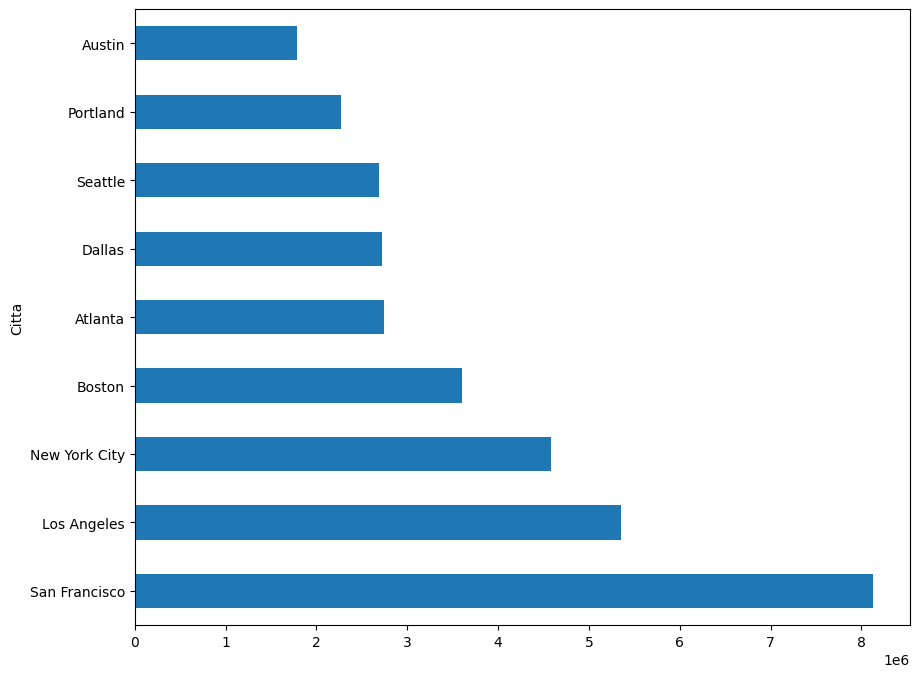

In [245]:
#rappresentazione grafica
df_clean.groupby('Citta').sum()["Ricavi"].sort_values(ascending=False).plot.barh(figsize=(10, 8))

Abbiamo realizzato vendite migliori a San Francisco

A che ora del giorno dovremmo fare pubblicità per aumentare le vendite?

In [246]:
df_clean['Ora'] = df_clean.index.hour
df_clean['time'] = df_clean.index.time

In [247]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Ricavi,Citta,Ora,time
Order Date,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3,03:07:00
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3,03:40:00
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4,04:56:00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5,05:53:00
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6,06:03:00


In [248]:
df_clean.groupby('Ora')['Ricavi'].sum().sort_values(ascending=False)

Ora
19    2370005.59
12    2269676.91
11    2267169.73
20    2242856.37
18    2176209.65
13    2118394.83
17    2086082.23
14    2045085.42
21    2013288.02
10    1907179.29
15    1900151.56
16    1864530.92
9     1612498.90
22    1578173.21
8     1181363.76
23    1161803.96
7      734595.75
0      698694.76
1      447663.86
6      441523.14
2      234191.08
5      224313.72
4      161350.57
3      142976.54
Name: Ricavi, dtype: float64

In [250]:
Ric_per_ora = pd.DataFrame(df_clean.groupby('Ora')['Ricavi'].sum())
Ric_per_ora

,Ricavi
Ora,
0,698694.76
1,447663.86
2,234191.08
3,142976.54
4,161350.57
5,224313.72
6,441523.14
7,734595.75
8,1181363.76


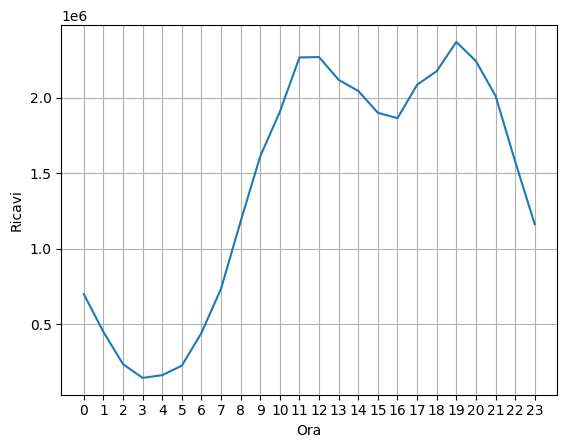

In [256]:
sns.lineplot(data=Ric_per_ora['Ricavi'])
plt.xticks(ticks=range(0, 24))
plt.grid()
plt.show()

La pubblicità deve essere fatta tra le ore 10 e le 11 e tra le 18 e le 19.

Quali prodotti vengono spesso acquistati insieme?

In [257]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Ricavi,Citta,Ora,time
Order Date,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3,03:07:00
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3,03:40:00
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4,04:56:00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5,05:53:00
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6,06:03:00


In [260]:
#cercare le vendite di prodotti con lo stesso  numero di ordine
df_clean[df_clean['Order ID'].duplicated(keep =False)]

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Ricavi,Citta,Ora,time
Order Date,,,,,,,,,,
2019-01-01 07:29:00,144804,Wired Headphones,1,11.99,"628 Lake St, New York City, NY 10001",January,11.99,New York City,7,07:29:00
2019-01-01 07:29:00,144804,iPhone,1,700.00,"628 Lake St, New York City, NY 10001",January,700.00,New York City,7,07:29:00
2019-01-01 11:25:00,148074,Google Phone,1,600.00,"6 Johnson St, Atlanta, GA 30301",January,600.00,Atlanta,11,11:25:00
2019-01-01 11:25:00,148074,USB-C Charging Cable,1,11.95,"6 Johnson St, Atlanta, GA 30301",January,11.95,Atlanta,11,11:25:00
2019-01-01 12:02:00,148450,iPhone,1,700.00,"761 Lakeview St, Dallas, TX 75001",January,700.00,Dallas,12,12:02:00
...,...,...,...,...,...,...,...,...,...,...
2020-01-01 00:10:00,311386,Apple Airpods Headphones,1,150.00,"730 Pine St, San Francisco, CA 94016",January,150.00,San Francisco,0,00:10:00
2020-01-01 00:22:00,297817,Lightning Charging Cable,2,14.95,"519 13th St, New York City, NY 10001",January,29.90,New York City,0,00:22:00
2020-01-01 00:22:00,297817,iPhone,1,700.00,"519 13th St, New York City, NY 10001",January,700.00,New York City,0,00:22:00


In [272]:
df_m = df_clean[df_clean['Order ID'].duplicated(keep =False)].copy()

In [273]:
#funzione che trasforma una lista in stringa
def concat_prodotto_per_order_id(p: list):
  return ";".join(p)

In [274]:
df_m.groupby('Order ID')['Product'].apply(concat_prodotto_per_order_id)

Order ID
141275              USB-C Charging Cable;Wired Headphones
141290     Apple Airpods Headphones;AA Batteries (4-pack)
141365                   Wired Headphones;Vareebadd Phone
141384                  USB-C Charging Cable;Google Phone
141450            Bose SoundSport Headphones;Google Phone
                               ...                       
319536                Wired Headphones;Macbook Pro Laptop
319556                      Google Phone;Wired Headphones
319584                            iPhone;Wired Headphones
319596                    Lightning Charging Cable;iPhone
319631    Lightning Charging Cable;34in Ultrawide Monitor
Name: Product, Length: 6928, dtype: object

In [275]:
insieme = df_m.groupby('Order ID')['Product'].apply(concat_prodotto_per_order_id)

In [282]:
#importiamo delle librerie per creare delle combinazioni
from itertools import combinations
from collections import Counter #contare il numero di occorenze in una lista

In [283]:
insieme.to_list()

['USB-C Charging Cable;Wired Headphones',
 'Apple Airpods Headphones;AA Batteries (4-pack)',
 'Wired Headphones;Vareebadd Phone',
 'USB-C Charging Cable;Google Phone',
 'Bose SoundSport Headphones;Google Phone',
 'Apple Airpods Headphones;iPhone',
 'Google Phone;Apple Airpods Headphones',
 'iPhone;Apple Airpods Headphones;Wired Headphones',
 'Apple Airpods Headphones;USB-C Charging Cable',
 'Wired Headphones;Lightning Charging Cable',
 'iPhone;Lightning Charging Cable',
 '27in FHD Monitor;Bose SoundSport Headphones',
 'USB-C Charging Cable;Google Phone',
 'Wired Headphones;iPhone',
 'Google Phone;USB-C Charging Cable',
 'AA Batteries (4-pack);AAA Batteries (4-pack)',
 'Vareebadd Phone;Wired Headphones;USB-C Charging Cable',
 'USB-C Charging Cable;Google Phone',
 'Vareebadd Phone;Wired Headphones',
 'Lightning Charging Cable;34in Ultrawide Monitor',
 'USB-C Charging Cable;Wired Headphones',
 'Lightning Charging Cable;Bose SoundSport Headphones',
 'Wired Headphones;Google Phone',
 'Wired

In [289]:
count = Counter()

for acquisti in insieme.to_list():
  prodotti = acquisti.split(';')
  print(prodotti)
  count.update(Counter(combinations(prodotti, 2)))
  #break

Output streaming troncato alle ultime 5000 righe.
['iPhone', 'Wired Headphones']
['Lightning Charging Cable', 'Apple Airpods Headphones']
['27in 4K Gaming Monitor', 'AA Batteries (4-pack)']
['Google Phone', 'USB-C Charging Cable']
['Google Phone', 'AAA Batteries (4-pack)']
['iPhone', 'AA Batteries (4-pack)']
['Apple Airpods Headphones', 'iPhone', 'Lightning Charging Cable']
['Bose SoundSport Headphones', 'iPhone']
['Lightning Charging Cable', 'Lightning Charging Cable']
['USB-C Charging Cable', 'AA Batteries (4-pack)']
['Lightning Charging Cable', 'iPhone']
['Bose SoundSport Headphones', 'Apple Airpods Headphones']
['Wired Headphones', 'Flatscreen TV']
['USB-C Charging Cable', 'Vareebadd Phone']
['USB-C Charging Cable', '34in Ultrawide Monitor']
['iPhone', 'Apple Airpods Headphones']
['Bose SoundSport Headphones', 'Google Phone']
['Lightning Charging Cable', 'iPhone']
['USB-C Charging Cable', 'Google Phone']
['USB-C Charging Cable', '20in Monitor']
['27in FHD Monitor', 'Flatscreen TV']

In [293]:
#identificare i 5 migliori elementi#
count.most_common(5)

[(('iPhone', 'Lightning Charging Cable'), 509),
 (('Google Phone', 'USB-C Charging Cable'), 492),
 (('USB-C Charging Cable', 'Google Phone'), 474),
 (('Lightning Charging Cable', 'iPhone'), 474),
 (('iPhone', 'Wired Headphones'), 236)]

Quale prodotto ha venduto di più e perché?

In [294]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Ricavi,Citta,Ora,time
Order Date,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3,03:07:00
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3,03:40:00
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4,04:56:00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5,05:53:00
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6,06:03:00


In [295]:
df_clean.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)


Product
AAA Batteries (4-pack)        30487
AA Batteries (4-pack)         27148
USB-C Charging Cable          23555
Lightning Charging Cable      22841
Wired Headphones              20201
Apple Airpods Headphones      15383
Bose SoundSport Headphones    13236
27in FHD Monitor               7429
iPhone                         6732
27in 4K Gaming Monitor         6134
34in Ultrawide Monitor         6076
Google Phone                   5440
Flatscreen TV                  4724
Macbook Pro Laptop             4645
20in Monitor                   4058
ThinkPad Laptop                4054
Vareebadd Phone                2023
LG Washing Machine              649
LG Dryer                        640
Name: Quantity Ordered, dtype: int64